### Here I have imported all required libraries
- pandas : To analyze the data
- numpy : To work with arrays and some mathematical operations
- matplotlib : It is an amazing data visualization library to work with 2D graphs and plots and to visualization the data
- seaborn : It is an amazing data visualization library for statistical graphics plotting in Python. Seaborn was built on top of Matplotlib
- warnings : It will ignore warnings while doing visualizations on any plots or graphs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading the data in csv format

In [3]:
telecom = pd.read_csv('data.csv')
telecom.head()

,Id,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,CUST-1,KS,128,415,No,Yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,CUST-2,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,CUST-3,NJ,137,415,No,No,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,CUST-4,OH,84,408,Yes,No,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,CUST-5,OK,75,415,Yes,No,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- head() is used to show top 5 records.

In [4]:
telecom.shape

(3333, 21)

- shape is used to see how many rows and features are present.

In [5]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      3333 non-null   object 
 1   State                   3333 non-null   object 
 2   Account length          3333 non-null   int64  
 3   Area code               3333 non-null   int64  
 4   International plan      3333 non-null   object 
 5   Voice mail plan         3333 non-null   object 
 6   Number vmail messages   3333 non-null   int64  
 7   Total day minutes       3333 non-null   float64
 8   Total day calls         3333 non-null   int64  
 9   Total day charge        3333 non-null   float64
 10  Total eve minutes       3333 non-null   float64
 11  Total eve calls         3333 non-null   int64  
 12  Total eve charge        3333 non-null   float64
 13  Total night minutes     3333 non-null   float64
 14  Total night calls       3333 non-null   

- info() is used to vizualize the non-null values and Dtype of features.

In [6]:
telecom.isnull().sum()

Id                        0
State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

- isnull().sum() is used to check null values and there total sum.

In [7]:
telecom.dtypes

Id                         object
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

### Data Preprocessing

- Unrelevant features would be dropped to clean the data and decrease the training speed.
- Therefore, finding and selecting the most useful features in the dataset is crucial.

In [8]:
telecom.drop(['Id', 'State', 'Area code'], axis=1, inplace=True)

In [9]:
telecom.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### EDA 

- Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

array([[<AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>]], dtype=object)

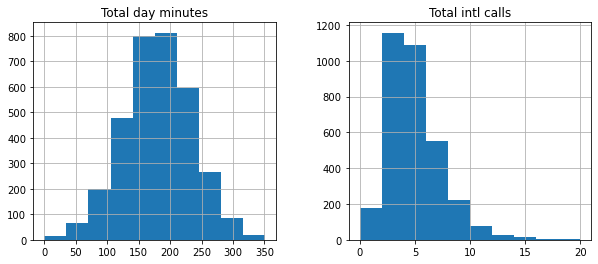

In [10]:
features = ["Total day minutes", "Total intl calls"]
telecom[features].hist(figsize=(10, 4))

- In the above plot, we see that the variable Total day minutes is normally distributed, while Total intl calls is prominently skewed right (its tail is longer on the right).

<AxesSubplot:xlabel='Total intl calls', ylabel='Density'>

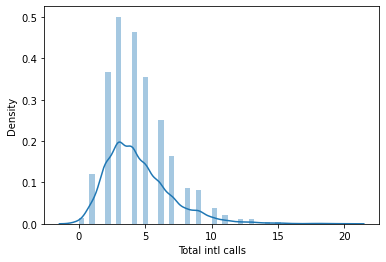

In [11]:
sns.distplot(telecom['Total intl calls'])

- The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

<AxesSubplot:xlabel='Total intl calls'>

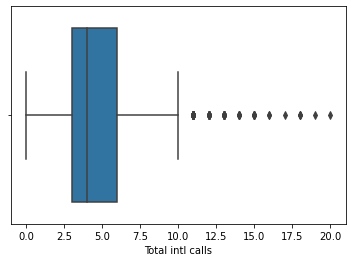

In [12]:
sns.boxplot(x = 'Total intl calls', data=telecom)

- The box plot length is determined by **25th percentile i.e. (Q1)** and **75th percentile i.e. (Q3)**. The vertical line inside the box marks as **median i.e. 50%** of the distribution. Basically this plot is used to find **outliers.**
- Outliers that fall outside of the range bounded by the whiskers **above 10.0** are plotted individually as black points are outliers.
- **We can see that a large number of international calls is quite rare in our data.**

In [13]:
telecom.describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


- It shows only the numerical features from our records.

In [14]:
telecom['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

- In our case the data is not balanced i.e. our two target classes, loyal and disloyal customers, are not represented equally in the dataset.
- Only a small part of the clients canceled their subscription to the telecom service.
- we may want to additionally penalize our model errors in predicting the minority "Churn" class.

<AxesSubplot:xlabel='Churn', ylabel='count'>

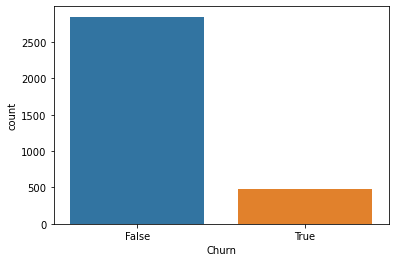

In [15]:
sns.countplot(x="Churn", data=telecom)

- This chart illustrates the imbalance in our target variable

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

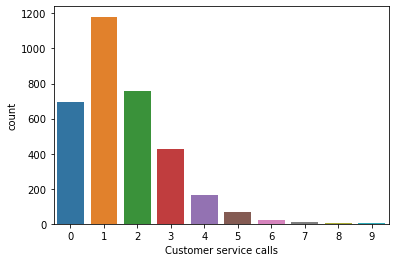

In [16]:
sns.countplot(x="Customer service calls", data=telecom)

- The bar plot for Customer service calls gives a hint that the majority of customers resolve their problems in maximum 2-3 calls.
- The tail of that bar plot contains most of our churn.

Text(0.5, 1.0, 'Correlation Matrix Of Telecom Customers')

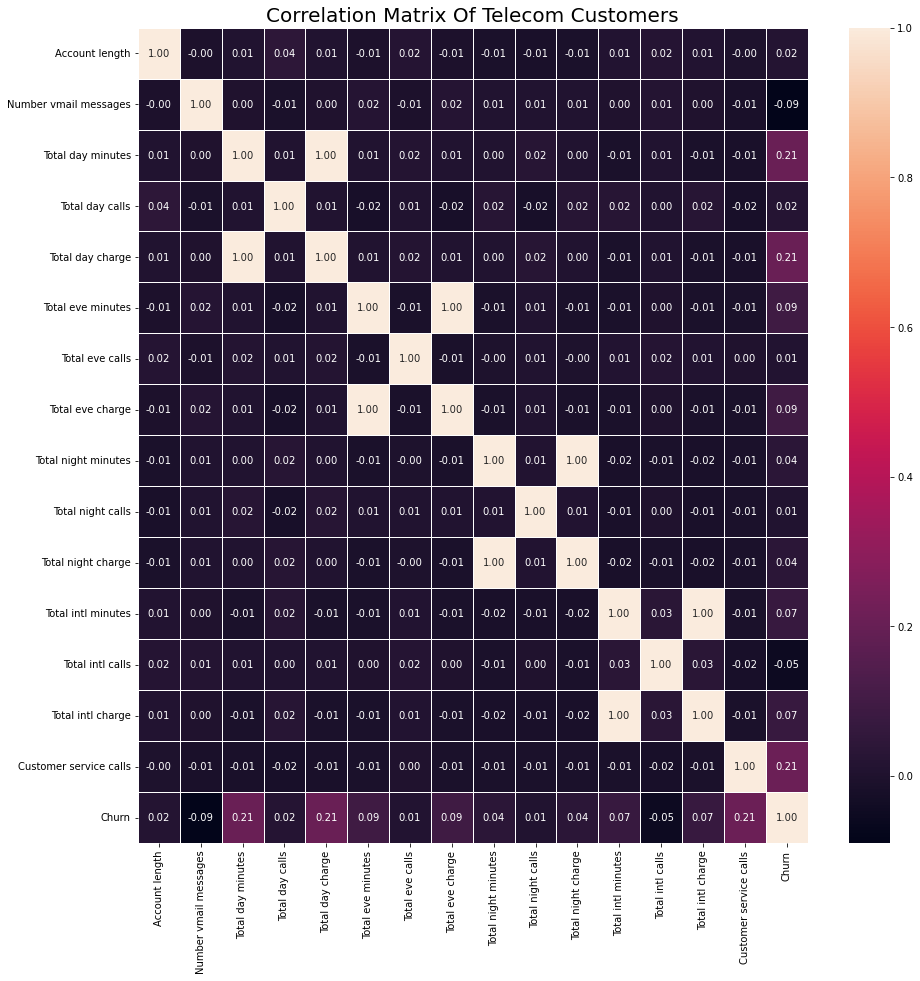

In [17]:
plt.figure(figsize=(15, 15))
sns.heatmap(telecom.corr(), annot=True, linewidths=1, fmt='.2f')
plt.title('Correlation Matrix Of Telecom Customers', fontsize=20)

- From this visualization we come up with that **Total day minutes and Total day charge are highly correlated.**
- **Total eve minutes and Total eve charge are also highly correlated.**
- **Total night minutes and Total night charge are also highly correlated.**
- **Total intl minutes and Total intl charge are also highly correlated.**
- And somehow we can say that **Customer service calls are also the reason for churn.**
- **Total day minutes and Total day charge are quite correlated with churn so this will also get impacted for customer churn.**

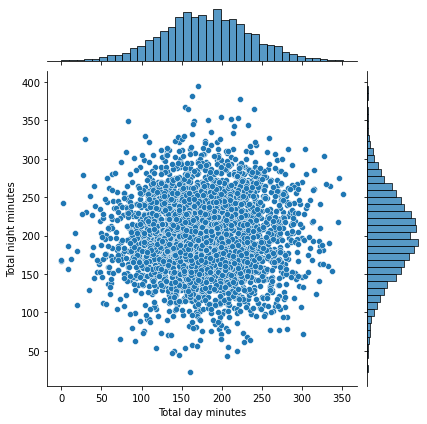

In [18]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=telecom, kind="scatter")

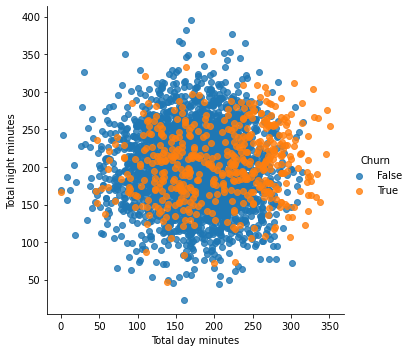

In [19]:
sns.lmplot("Total day minutes", "Total night minutes", data=telecom, hue="Churn", fit_reg=False)

- It seems that our small portion of disloyal customers lean towards the top-right corner that is, such customers tend to spend more time on the phone during both day and night.
- Also while noticing the chart it shows that Total day minutes in between **100-325 the churn rate is more.** 
- And similarly for Total night minutes it varies in between some around **125-300 the churn rate is more.**

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

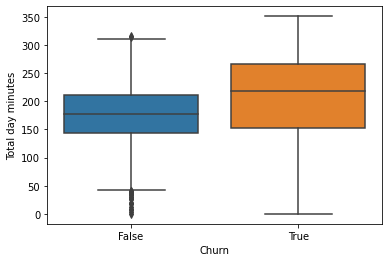

In [20]:
sns.boxplot(x="Churn", y="Total day minutes", data=telecom)

- From this boxplot everything is clear that disloyal customers tends to talk on the phone more than loyal customers.




- **An interesting observation** : On average, *customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.*

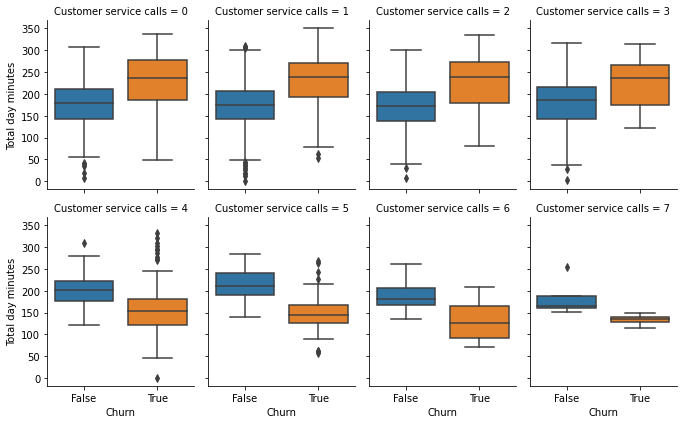

In [22]:
sns.catplot(x="Churn", y="Total day minutes", col="Customer service calls", data=telecom[telecom["Customer service calls"] < 8], kind="box", col_wrap=4, height=3, aspect=0.8)

- From this, we could conclude that **starting with 4 calls Total day minutes may no longer be the main factor for customer churn**. Perhaps in addition to our previous guess about the tariffs, **there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.**

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

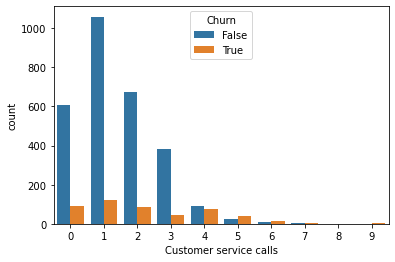

In [23]:
sns.countplot(x="Customer service calls", hue="Churn", data=telecom)

- **An observation** : The churn rate increases significantly after 4 or more calls to customer service.

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

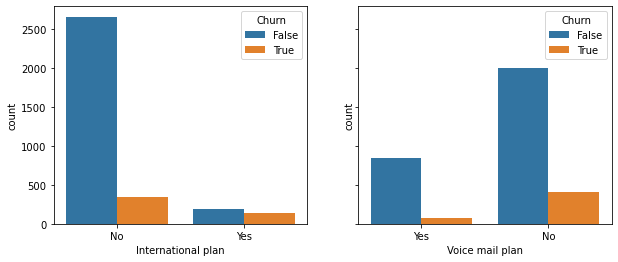

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=telecom, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=telecom, ax=axes[1])

- **An observation**: when *International Plan* is enabled, **the churn rate is much higher** the usage of the *international plan* by the customer is a strong feature. We do not observe the same effect with *Voice mail plan.*

In [25]:
telecom['International plan'] = telecom['International plan'].map({'Yes':1, 'No':0})
telecom['Voice mail plan'] = telecom['Voice mail plan'].map({'Yes':1, 'No':0})

In [26]:
telecom['Churn'] = telecom['Churn'].map({False:1, True:0})

In [27]:
telecom.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


### Feature Scaling

- We have to scale down the features in between 0-1. Because we cannot give this type of numerical values to our model.
- It may became a big blunder.
- To scale down we will be using standardization method.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(telecom.iloc[:, 0:17])
telecom_std = pd.DataFrame(X_scaled, columns=['Account length', 
                                              'International plan', 
                                              'Voice mail plan', 
                                              'Number vmail messages', 
                                              'Total day minutes', 
                                              'Total day calls', 
                                              'Total day charge', 
                                              'Total eve minutes', 
                                              'Total eve calls',
                                              'Total eve charge',
                                              'Total night minutes',
                                              'Total night calls',
                                              'Total night charge', 
                                              'Total intl minutes', 
                                              'Total intl calls', 
                                              'Total intl charge', 
                                              'Customer service calls'])
telecom_std

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.676489,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.327580,1.617086,2.038605,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,0.332354
3329,-0.830437,-0.327580,-0.618396,-0.591760,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,1.092641
3330,-1.835055,-0.327580,-0.618396,-0.591760,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,0.332354
3331,2.082955,3.052685,-0.618396,-0.591760,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,0.332354


In [29]:
extracted_col = telecom['Churn']
telecom_std = telecom_std.join(extracted_col)

In [30]:
telecom_std

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0.676489,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,1
1,0.149065,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,1
2,0.902529,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,1
3,-0.428590,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,1
4,-0.654629,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.327580,1.617086,2.038605,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,0.332354,1
3329,-0.830437,-0.327580,-0.618396,-0.591760,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,1.092641,1
3330,-1.835055,-0.327580,-0.618396,-0.591760,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,0.332354,1
3331,2.082955,3.052685,-0.618396,-0.591760,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,0.332354,1


### Train-test split

- Before finding accuracy, precision and overall performance of model we have to split the data for train test split i.e.
- 70% data should go for training purpose and 30% data should go for testing purpose.
- we can split 80-20, 75-25 and 70-30 as per our need.

In [32]:
X = telecom_std.drop(['Churn'], axis=1)
y = telecom_std['Churn']

In [33]:
X

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.676489,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.327580,1.617086,2.038605,-0.432895,-1.167924,-0.433386,0.286348,1.299506,0.286880,1.547039,-0.874374,1.547188,-0.120832,0.617898,-0.125496,0.332354
3329,-0.830437,-0.327580,-0.618396,-0.591760,0.942447,-2.164631,0.942714,-0.938353,-2.264816,-0.938172,-0.189297,1.170023,-0.188670,-0.228304,-0.194831,-0.231645,1.092641
3330,-1.835055,-0.327580,-0.618396,-0.591760,0.018820,0.426808,0.019193,1.731930,-2.114211,1.732349,-0.177431,-0.465494,-0.175486,1.383778,0.617898,1.387123,0.332354
3331,2.082955,3.052685,-0.618396,-0.591760,0.624778,0.227466,0.625153,-0.816080,-0.808966,-0.815203,-1.219628,1.885562,-1.221396,-1.876211,2.243356,-1.876950,0.332354


In [34]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3328    1
3329    1
3330    1
3331    1
3332    1
Name: Churn, Length: 3333, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=True)

In [36]:
X_train.shape, X_test.shape

((2333, 17), (1000, 17))

In [37]:
y_train.shape, y_test.shape

((2333,), (1000,))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model_LR = LogisticRegression(max_iter=100000)
model_LR.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

- Here we have used LogisticRegression model. As we know that it is binary classification problem statement it is solved by LR.

In [39]:
y_predict = model_LR.predict(X_test)

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.42      0.15      0.22       145
           1       0.87      0.96      0.92       855

    accuracy                           0.85      1000
   macro avg       0.65      0.56      0.57      1000
weighted avg       0.81      0.85      0.81      1000



<AxesSubplot:>

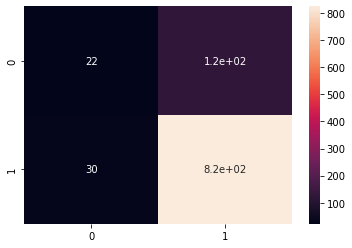

In [41]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
scores

array([0.94646681, 0.88008565, 0.91220557, 0.91630901, 0.91416309])

- Cross-validation is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits.
-  This gives you a better indication of how well your model will perform on unseen data. on the other hand, it is dependent on just one train-test split.

In [43]:
scores.mean()

0.9138460265965757

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_predict = model_dt.predict(X_test)

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       145
           1       0.95      0.94      0.95       855

    accuracy                           0.91      1000
   macro avg       0.81      0.84      0.82      1000
weighted avg       0.91      0.91      0.91      1000



<AxesSubplot:>

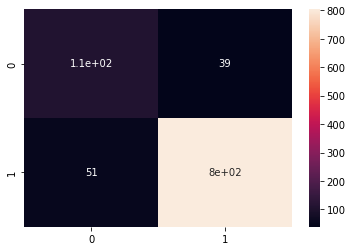

In [47]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [48]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

- Here we have also used Random forest classifier because we all know that random forest uses multiple decision tree so the accuracy of random forest is more than DT (Decision tree). The base learners/models are DT.

In [49]:
y_predict = model_rf.predict(X_test)

In [50]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       145
           1       0.95      0.99      0.97       855

    accuracy                           0.94      1000
   macro avg       0.92      0.84      0.88      1000
weighted avg       0.94      0.94      0.94      1000



<AxesSubplot:>

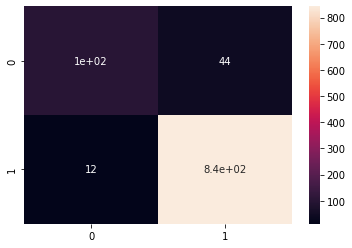

In [51]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

- RF heatmap

In [52]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                              n_estimators=100, 
                              max_samples=0.8, 
                              oob_score=True, 
                              random_state=0)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.9511358765537934

In [53]:
bag_model.score(X_test, y_test)

0.948

In [54]:
bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                              n_estimators=100, 
                              max_samples=0.8, 
                              oob_score=True, 
                              random_state=0)
scores = cross_val_score(bag_model, X_train, y_train, cv=5)
scores.mean()

0.9485594287342274

- You will notice here that the base model gives you 91% accuracy where as the bagged model gives you 94% accuracy.

In [55]:
model_bg = BaggingClassifier()
model_bg.fit(X_train, y_train)

BaggingClassifier()

In [56]:
y_predict = model_bg.predict(X_test)

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       145
           1       0.96      0.97      0.97       855

    accuracy                           0.94      1000
   macro avg       0.90      0.86      0.88      1000
weighted avg       0.94      0.94      0.94      1000



   ### Comparing Each Model With the ROC Curve
   
   - ROC curve, also known as Receiver Operating Characteristics Curve, is a metric used to measure the performance of a classifier model.
   - The ROC curve depicts the rate of true positives with respect to the rate of false positives, therefore highlighting the sensitivity of the classifier model.
   - The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).

In [58]:
from sklearn.metrics import roc_curve

In [59]:
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)
[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_dt.predict_proba(X_test)
[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)
[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_bg.predict_proba(X_test)
[:, 1], pos_label = 1)

- Receiver Operating Characteristics Curve **(ROC) curve**

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)
[:, 1])
auc_score2 = roc_auc_score(y_test, model_dt.predict_proba(X_test)
[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)
[:, 1])
auc_score4 = roc_auc_score(y_test, model_bg.predict_proba(X_test)
[:, 1])

print('Logistic Regression : ', auc_score1)
print('Decision Tree Classifier : ', auc_score2)
print('Random Forest Classifier : ', auc_score3)
print('Bagging Classifier : ', auc_score4)

Logistic Regression :  0.7890542448074208
Decision Tree Classifier :  0.8356926799758015
Random Forest Classifier :  0.9069409155071588
Bagging Classifier :  0.8959467634603752


- Area under the ROC Curve **(AUC) curve**

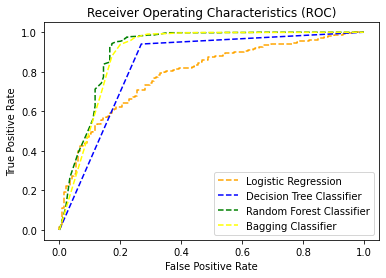

In [62]:
plt.plot(fpr1, tpr1 ,Linestyle = '--', color = 'orange', label = 'Logistic Regression')
plt.plot(fpr2, tpr2 ,Linestyle = '--', color = 'blue', label = 'Decision Tree Classifier')
plt.plot(fpr3, tpr3 ,Linestyle = '--', color = 'green', label = 'Random Forest Classifier')
plt.plot(fpr4, tpr4 ,Linestyle = '--', color = 'yellow', label = 'Bagging Classifier')

plt.title('Receiver Operating Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc ='best')
plt.savefig('ROC', dpi = 1000)
plt.show()

### Conclusion : 

- **The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.**